<a href="https://colab.research.google.com/github/juxewe/DS_Xenia_Welsch/blob/main/Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Project Dataset
   
This notebook is designed to give an overview over our projects dataset available here: https://github.com/semacu/202101-data-science-python

Here are some ideas on how to investigate the data-scientifical potential:

### Data Exploration:

- Load the dataset into a suitable data structure (e.g., pandas DataFrame in Python).
- Explore the dimensions of the dataset (number of rows and columns).
- Examine the first few rows to understand the structure and types of data present.
- Check for missing values and handle them appropriately (e.g., imputation, removal).

### Descriptive Statistics:

- Compute summary statistics for numerical variables (e.g., mean, median, standard deviation, min, max).
- Explore the distribution of numerical variables using histograms, box plots, etc.
- Analyze categorical variables by calculating frequencies and percentages for each category.

### Data Preprocessing:

- Convert categorical variables into a suitable format for analysis (e.g., one-hot encoding).
- Scale numerical features if needed (e.g., using Min-Max scaling or standardization).
- Consider feature engineering if necessary (e.g., creating new features from existing ones).

### Exploratory Data Analysis (EDA):

- Investigate relationships between different variables using visualizations such as scatter plots, heatmaps, and pair plots.
- Explore correlations between clinical features and gene expression profiles.
- Look for patterns or clusters within the data using techniques like clustering or dimensionality reduction (e.g., PCA).

### Hypothesis Testing:

- If applicable, formulate hypotheses related to the dataset and test them using appropriate statistical tests (e.g., t-test, chi-square test).

### Predictive Modeling:

- Depending on the objectives of the analysis, build predictive models to predict outcomes such as patient survival or response to treatment.
- Split the dataset into training and testing sets.
- Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, support vector machines) based on the nature of the problem and the data.
- Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.

### Interpretation and Reporting:

- Interpret the results of the analysis in the context of the problem domain.
- Provide actionable insights and recommendations based on the findings.
- Create visualizations and reports to communicate the results effectively to stakeholders.

<hr style="border:2px solid gray"> </hr>   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/TechLabs/TechLabs/

/content/drive/MyDrive/TechLabs/TechLabs


### Data Exploration

Loading the Data into pandas DataFrame and examine the first few rows to understand the structure and types of data present.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [50]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/semacu/202101-data-science-python/main/data/metabric_clinical_and_expression_data.csv"

# Load the dataframe from the URL
metabric = pd.read_csv(url)

# Display the first few rows of the dataframe
metabric.head(3)

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Cancer_type,ER_status,PR_status,HER2_status,HER2_status_measured_by_SNP6,PAM50,3-gene_classifier,Nottingham_prognostic_index,Cellularity,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
0,MB-0000,1,75.65,140.500000,LIVING,Living,NO,YES,22.0,2.0,3.0,10,3,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,NEUTRAL,claudin-low,ER-/HER2-,6.044,NaN,4ER+,NaN,8.929817,9.333972,5.680501,6.338739,5.704157,6.932146,7.953794,9.729728
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,3.0,0,1,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumA,ER+/HER2- High Prolif,4.020,High,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570
2,MB-0005,1,48.87,163.700000,DECEASED,Died of Disease,YES,NO,15.0,2.0,2.0,1,2,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,NaN,4.030,High,3,2.0,10.041281,9.725825,7.376123,6.404516,6.751566,9.289758,11.698169,10.306115


In [57]:
df2 = pd.read_csv('brca_metabric_clinical_data.csv')

In [58]:
metabric.columns

Index(['Patient_ID', 'Cohort', 'Age_at_diagnosis', 'Survival_time',
       'Survival_status', 'Vital_status', 'Chemotherapy', 'Radiotherapy',
       'Tumour_size', 'Tumour_stage', 'Neoplasm_histologic_grade',
       'Lymph_nodes_examined_positive', 'Lymph_node_status', 'Cancer_type',
       'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
       'PAM50', '3-gene_classifier', 'Nottingham_prognostic_index',
       'Cellularity', 'Integrative_cluster', 'Mutation_count', 'ESR1', 'ERBB2',
       'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH'],
      dtype='object')

In [59]:
df2.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [60]:
df2=df2.drop(columns={"Study ID", "Age at Diagnosis", "Sample ID", "Cohort", "Cancer Type", "Pam50 + Claudin-low subtype", "Chemotherapy", "ER Status", "Neoplasm Histologic Grade", "HER2 status measured by SNP6", "HER2 Status", "Integrative Cluster", "Cellularity", "Lymph nodes examined positive", "Mutation Count", "Nottingham prognostic index", "Radio Therapy", "3-Gene classifier subtype", "Tumor Size", "Tumor Stage", "Patient's Vital Status", "Overall Survival (Months)", "Overall Survival Status", "PR Status"})

In [61]:
df2=df2.rename(columns={"Patient ID": "Patient_ID", "3-gene_Classifier": "3gene_Classifier"})

In [62]:
df2.head(1)

,Patient_ID,Type of Breast Surgery,Cancer Type Detailed,ER status measured by IHC,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Oncotree Code,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,TMB (nonsynonymous)
0,MB-0000,MASTECTOMY,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Post,Right,IDC,138.65,0:Not Recurred,1,Primary,Female,0.0


In [63]:
df = pd.merge(metabric, df2, on='Patient_ID')

In [64]:
df=df.rename(columns={"3-gene_classifier": "3gene_classifier"})

In [65]:
df.head(1)

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Cancer_type,ER_status,PR_status,HER2_status,HER2_status_measured_by_SNP6,PAM50,3gene_classifier,Nottingham_prognostic_index,Cellularity,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH,Type of Breast Surgery,Cancer Type Detailed,ER status measured by IHC,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Oncotree Code,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,TMB (nonsynonymous)
0,MB-0000,1,75.65,140.5,LIVING,Living,NO,YES,22.0,2.0,3.0,10,3,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,NEUTRAL,claudin-low,ER-/HER2-,6.044,NaN,4ER+,NaN,8.929817,9.333972,5.680501,6.338739,5.704157,6.932146,7.953794,9.729728,MASTECTOMY,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Post,Right,IDC,138.65,0:Not Recurred,1,Primary,Female,0.0


Explore the dimensions of the dataset (number of rows and columns).

In [66]:
# Display the dimensions of the dataframe
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1904
Number of columns: 46


In [67]:
df_dead = df[df['Vital_status'] == 'Died of Disease']

In [68]:
df_dead['Nottingham_prognostic_index'].corr(df_dead['Survival_time'])

-0.26785785548328533

Check for missing values and handle them appropriately (e.g., imputation, removal).

In [80]:
# Check for missing values
df.isnull().sum()

Patient_ID                          0
Cohort                              0
Age_at_diagnosis                    0
Survival_time                       0
Survival_status                     0
Vital_status                        1
Chemotherapy                        0
Radiotherapy                        0
Tumour_size                         0
Tumour_stage                      501
Neoplasm_histologic_grade          72
Lymph_nodes_examined_positive       0
Lymph_node_status                   0
Cancer_type                        15
ER_status                           0
PR_status                           0
HER2_status                         0
HER2_status_measured_by_SNP6        0
PAM50                               0
3gene_classifier                  204
Nottingham_prognostic_index         0
Cellularity                        54
Integrative_cluster                 0
Mutation_count                      0
ESR1                                0
ERBB2                               0
PGR         

In [ ]:
print("Sum of all missing values:", df.isnull().sum().sum())

Sum of all missing values: 912


In [72]:
df_cleaned = df.copy()

# Handle missing values for numerical features
numerical_features = ['Tumour_size', 'Mutation_count']
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

# Handle missing values for ordinal features
ordinal_features = ['Tumour_stage', 'Neoplasm_histologic_grade']
for feature in ordinal_features:
    df_cleaned[feature].fillna(df_cleaned[feature].median(), inplace=True)

# Handle missing values for nominal features
nominal_features = ['Vital_status', 'Cancer_type', '3gene_classifier', 'Cellularity']
for feature in nominal_features:
    df_cleaned[feature].fillna('Unknown', inplace=True)

# Check if there are any missing values left
if df_cleaned.isnull().sum().any():
    print("There are still missing values in the cleaned dataframe.")
else:
    print("All missing values have been handled.")

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

There are still missing values in the cleaned dataframe.


,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Cancer_type,ER_status,PR_status,HER2_status,HER2_status_measured_by_SNP6,PAM50,3gene_classifier,Nottingham_prognostic_index,Cellularity,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH,Type of Breast Surgery,Cancer Type Detailed,ER status measured by IHC,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Oncotree Code,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,TMB (nonsynonymous)
0,MB-0000,1,75.65,140.500000,LIVING,Living,NO,YES,22.0,2.0,3.0,10,3,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,NEUTRAL,claudin-low,ER-/HER2-,6.044,Unknown,4ER+,5.0,8.929817,9.333972,5.680501,6.338739,5.704157,6.932146,7.953794,9.729728,MASTECTOMY,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Post,Right,IDC,138.65,0:Not Recurred,1,Primary,Female,0.000000
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,3.0,0,1,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumA,ER+/HER2- High Prolif,4.020,High,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Pre,Right,IDC,83.52,0:Not Recurred,1,Primary,Female,2.615035
2,MB-0005,1,48.87,163.700000,DECEASED,Died of Disease,YES,NO,15.0,2.0,2.0,1,2,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,Unknown,4.030,High,3,2.0,10.041281,9.725825,7.376123,6.404516,6.751566,9.289758,11.698169,10.306115,MASTECTOMY,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Pre,Right,IDC,151.28,1:Recurred,1,Primary,Female,2.615035
3,MB-0006,1,47.68,164.933333,LIVING,Living,YES,YES,25.0,2.0,2.0,3,2,Breast Mixed Ductal and Lobular Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,Unknown,4.050,Moderate,9,1.0,10.404685,10.334979,6.815637,6.869241,7.219187,8.667723,11.863379,10.472181,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Positve,Mixed,YES,Pre,Right,MDLC,162.76,0:Not Recurred,1,Primary,Female,1.307518
4,MB-0008,1,76.97,41.366667,DECEASED,Died of Disease,YES,YES,40.0,2.0,3.0,8,3,Breast Mixed Ductal and Lobular Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,ER+/HER2- High Prolif,6.080,High,9,2.0,11.276581,9.956267,7.331223,6.337951,5.817818,9.719781,11.625006,12.161961,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Positve,Mixed,YES,Post,Right,MDLC,18.55,1:Recurred,1,Primary,Female,2.615035


In [73]:
df_cleaned2=df.copy()

In [77]:
df_cleaned2.head(1)

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Cancer_type,ER_status,PR_status,HER2_status,HER2_status_measured_by_SNP6,PAM50,3gene_classifier,Nottingham_prognostic_index,Cellularity,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH,Type of Breast Surgery,Cancer Type Detailed,ER status measured by IHC,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Oncotree Code,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,TMB (nonsynonymous)
0,MB-0000,1,75.65,140.5,LIVING,Living,NO,YES,22.0,2.0,3.0,10,3,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,NEUTRAL,claudin-low,ER-/HER2-,6.044,NaN,4ER+,5.0,8.929817,9.333972,5.680501,6.338739,5.704157,6.932146,7.953794,9.729728,MASTECTOMY,Breast Invasive Ductal Carcinoma,Positve,Ductal/NST,YES,Post,Right,IDC,138.65,0:Not Recurred,1,Primary,Female,0.0


In [78]:
df_cleaned2["Tumour_stage"].fillna((df_cleaned2["Nottingham_prognostic_index"]-df_cleaned2["Lymph_node_status"])-(0.2*(df_cleaned2["Tumour_size"]/100)),inplace=True)

In [79]:
df_cleaned2.isnull().sum()

Patient_ID                          0
Cohort                              0
Age_at_diagnosis                    0
Survival_time                       0
Survival_status                     0
Vital_status                        1
Chemotherapy                        0
Radiotherapy                        0
Tumour_size                         0
Tumour_stage                        0
Neoplasm_histologic_grade          72
Lymph_nodes_examined_positive       0
Lymph_node_status                   0
Cancer_type                        15
ER_status                           0
PR_status                           0
HER2_status                         0
HER2_status_measured_by_SNP6        0
PAM50                               0
3gene_classifier                  204
Nottingham_prognostic_index         0
Cellularity                        54
Integrative_cluster                 0
Mutation_count                      0
ESR1                                0
ERBB2                               0
PGR         

In [ ]:
df_cleaned.isnull().sum()

Patient_ID                       0
Cohort                           0
Age_at_diagnosis                 0
Survival_time                    0
Survival_status                  0
Vital_status                     0
Chemotherapy                     0
Radiotherapy                     0
Tumour_size                      0
Tumour_stage                     0
Neoplasm_histologic_grade        0
Lymph_nodes_examined_positive    0
Lymph_node_status                0
Cancer_type                      0
ER_status                        0
PR_status                        0
HER2_status                      0
HER2_status_measured_by_SNP6     0
PAM50                            0
3-gene_classifier                0
Nottingham_prognostic_index      0
Cellularity                      0
Integrative_cluster              0
Mutation_count                   0
ESR1                             0
ERBB2                            0
PGR                              0
TP53                             0
PIK3CA              

### Descriptive Statistics

Compute summary statistics for numerical variables (e.g., mean, median, standard deviation, min, max).

In [ ]:
# Summary statistics for numerical variables
summary_stats = df.describe()
print(summary_stats)

            Cohort  Age_at_diagnosis  Survival_time  Tumour_size  \
count  1904.000000       1904.000000    1904.000000  1884.000000   
mean      2.643908         61.087054     125.121324    26.238726   
std       1.228615         12.978711      76.334148    15.160976   
min       1.000000         21.930000       0.000000     1.000000   
25%       1.000000         51.375000      60.825000    17.000000   
50%       3.000000         61.770000     115.616667    23.000000   
75%       3.000000         70.592500     184.716667    30.000000   
max       5.000000         96.290000     355.200000   182.000000   

       Tumour_stage  Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
count   1403.000000                1832.000000                    1904.000000   
mean       1.750535                   2.415939                       2.002101   
std        0.628999                   0.650612                       4.079993   
min        0.000000                   1.000000                 

Explore the distribution of numerical variables using histograms, box plots, etc.

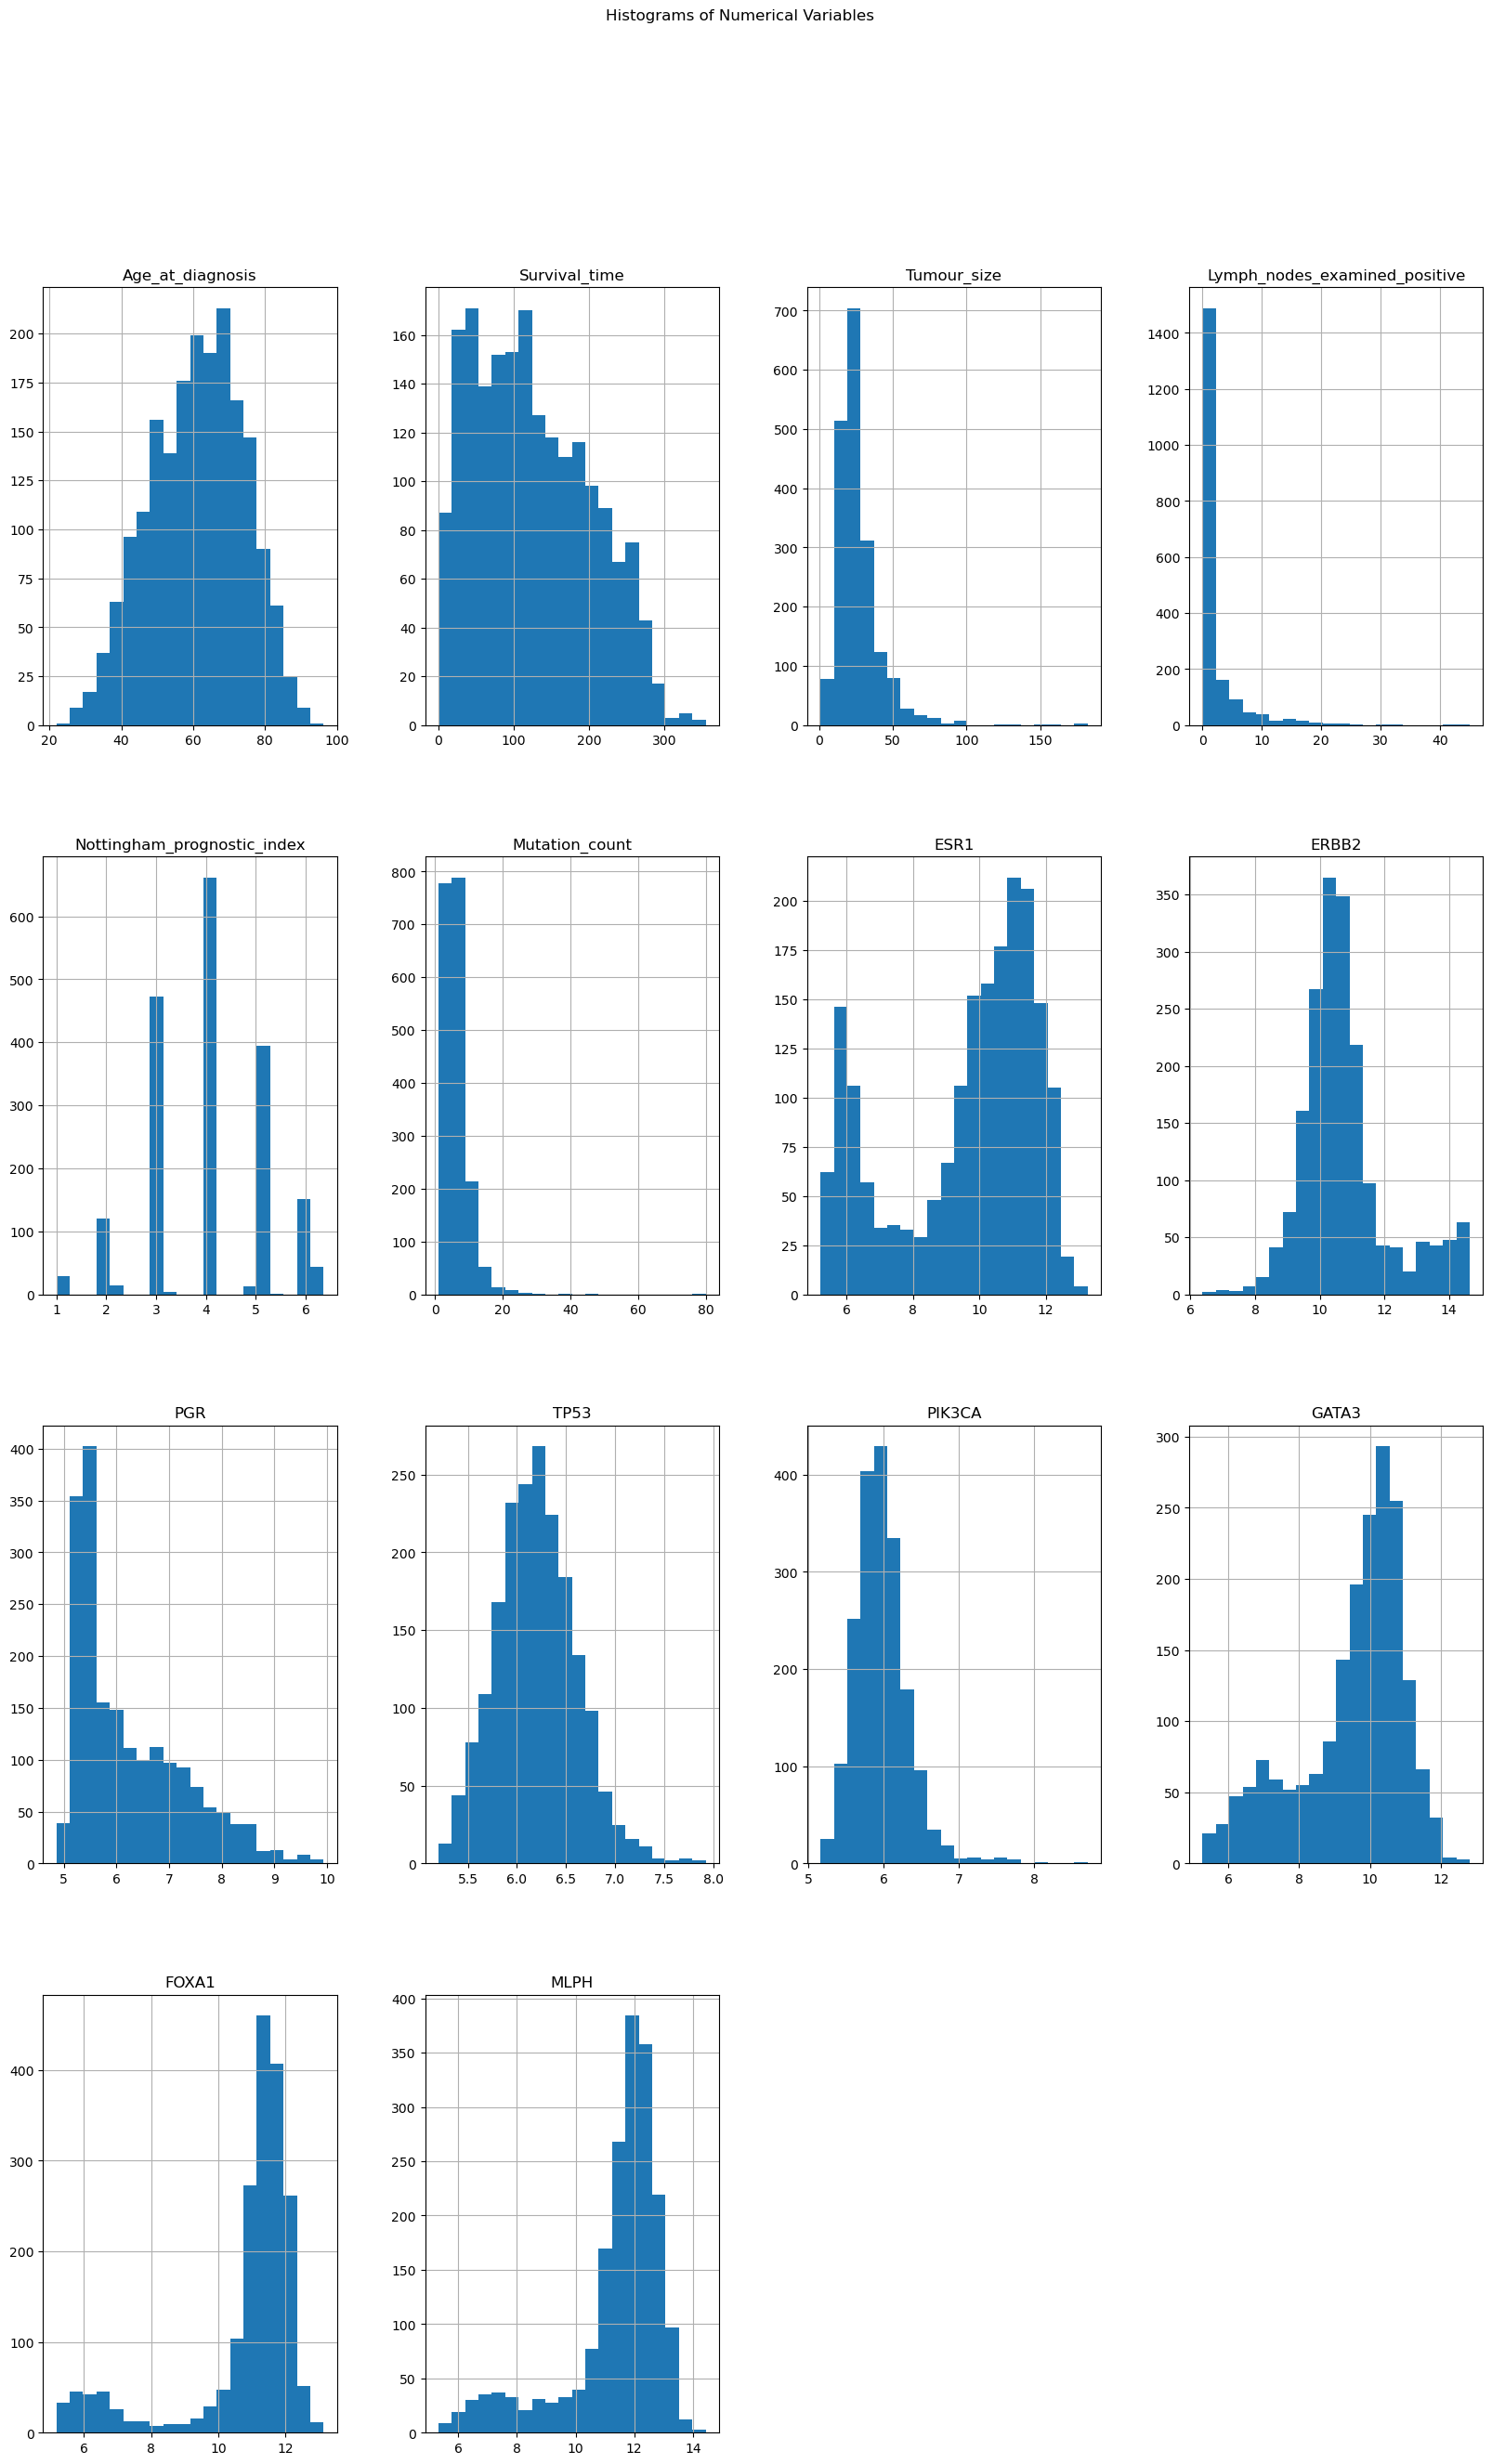

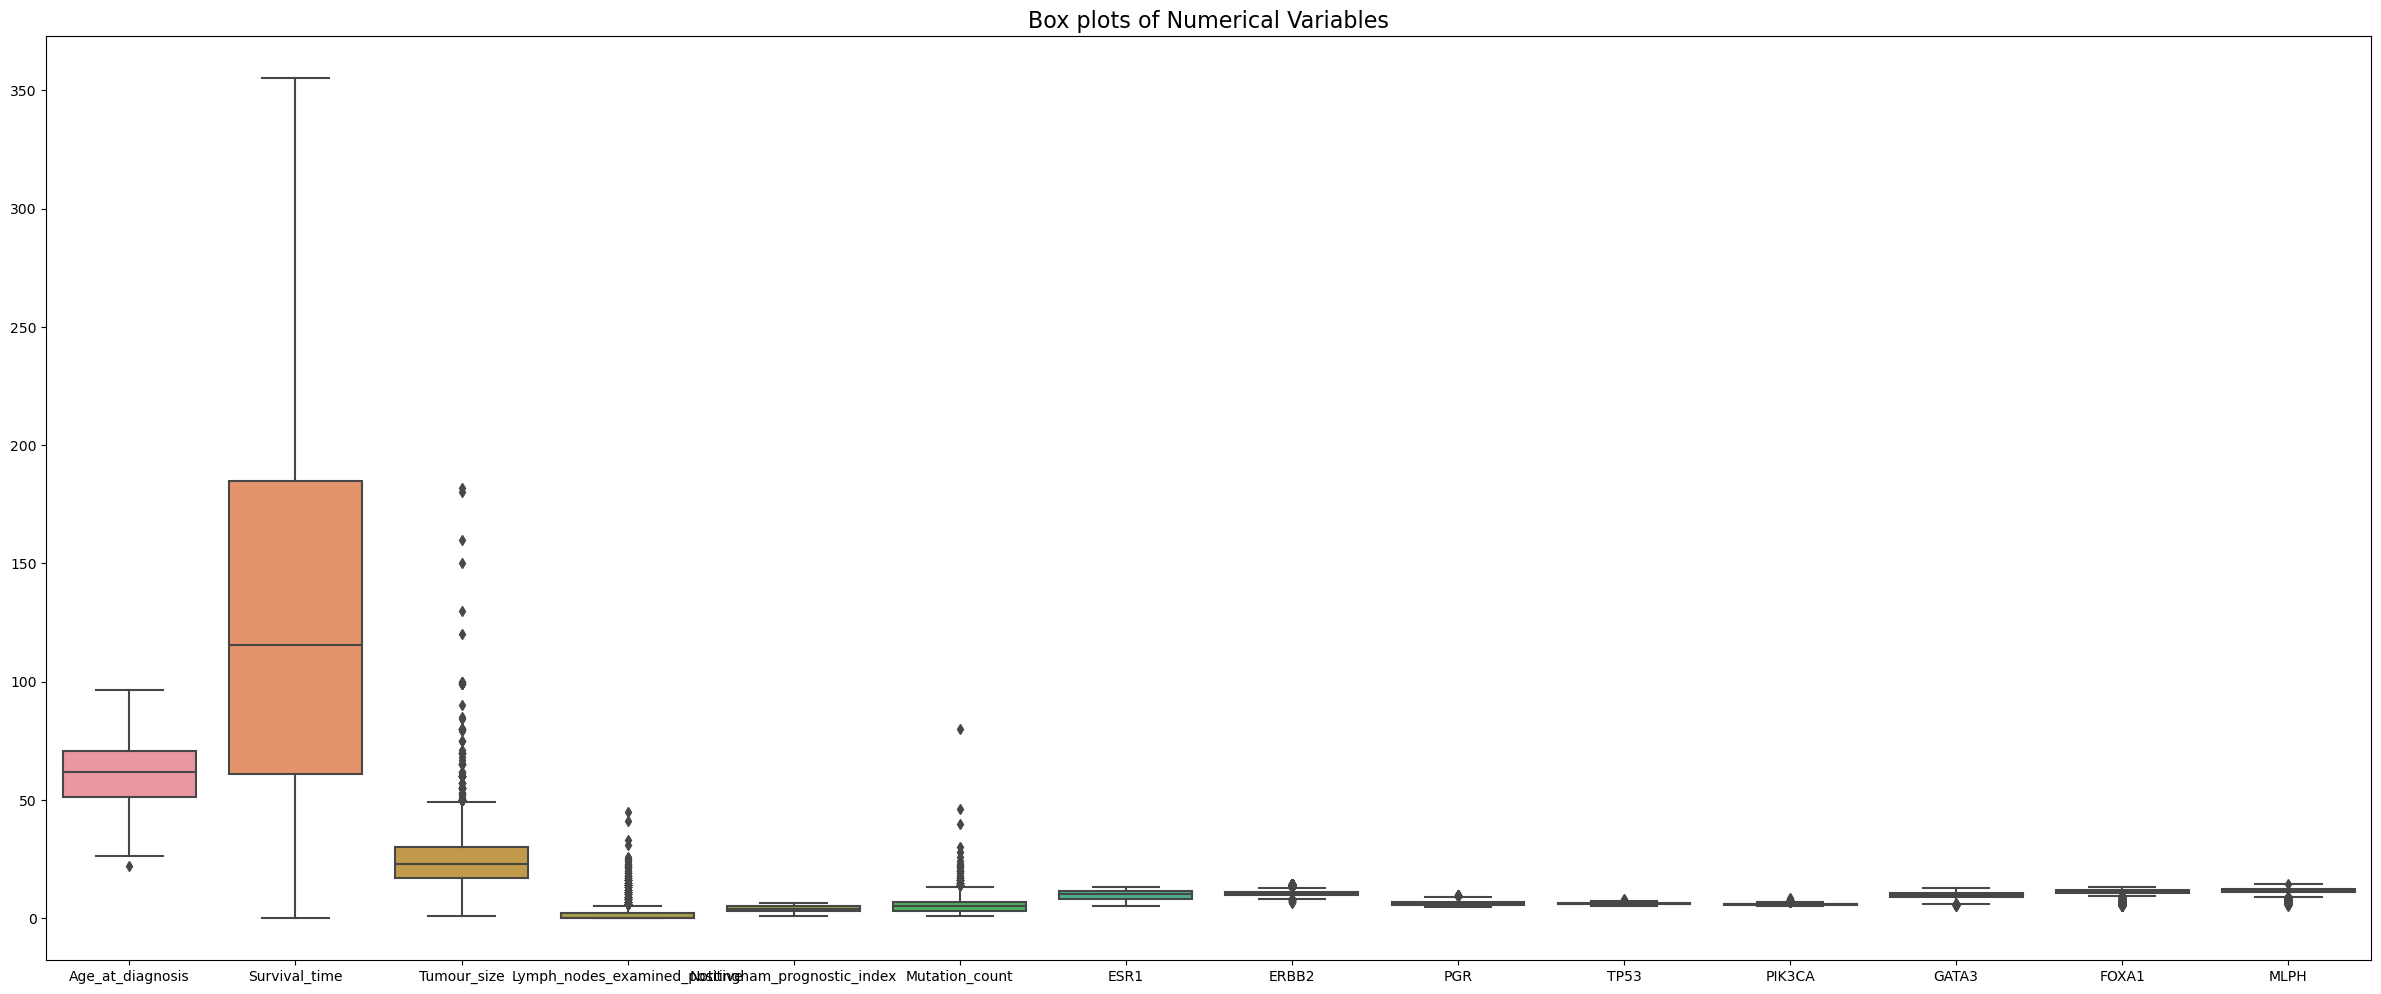

In [ ]:
# Plot histograms for numerical variables
numerical_vars = ['Age_at_diagnosis', 'Survival_time', 'Tumour_size', 'Lymph_nodes_examined_positive', 'Nottingham_prognostic_index', 'Mutation_count', 'ESR1', 'ERBB2', 'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH']
df[numerical_vars].hist(bins=20, figsize=(20, 30))
plt.suptitle("Histograms of Numerical Variables", fontsize=12)
plt.show()

# Plot box plots for numerical variables
plt.figure(figsize=(30, 12))
sns.boxplot(data=df[numerical_vars])
plt.title("Box plots of Numerical Variables", fontsize=16)
plt.show()

Analyze categorical variables by calculating frequencies and percentages for each category.

In [ ]:
# List of categorical variables
categorical_vars = ['Vital_status', 'Chemotherapy', 'Radiotherapy', 'Tumour_stage', 'Neoplasm_histologic_grade',
                    'Lymph_node_status', 'Cancer_type', 'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
                   'PAM50', '3-gene_classifier', 'Cellularity',]

# Calculate frequencies and percentages for each category
for var in categorical_vars:
    print("Variable:", var)
    print(df[var].value_counts(normalize=True) * 100)
    print()

Variable: Vital_status
Vital_status
Living                  42.091435
Died of Disease         32.685234
Died of Other Causes    25.223332
Name: proportion, dtype: float64

Variable: Chemotherapy
Chemotherapy
NO     79.201681
YES    20.798319
Name: proportion, dtype: float64

Variable: Radiotherapy
Radiotherapy
YES    59.716387
NO     40.283613
Name: proportion, dtype: float64

Variable: Tumour_stage
Tumour_stage
2.0    57.020670
1.0    33.856023
3.0     8.196721
4.0     0.641483
0.0     0.285103
Name: proportion, dtype: float64

Variable: Neoplasm_histologic_grade
Neoplasm_histologic_grade
3.0    50.600437
2.0    40.393013
1.0     9.006550
Name: proportion, dtype: float64

Variable: Lymph_node_status
Lymph_node_status
1    52.153361
2    31.722689
3    16.123950
Name: proportion, dtype: float64

Variable: Cancer_type
Cancer_type
Breast Invasive Ductal Carcinoma             79.407094
Breast Mixed Ductal and Lobular Carcinoma    10.958179
Breast Invasive Lobular Carcinoma             7.5

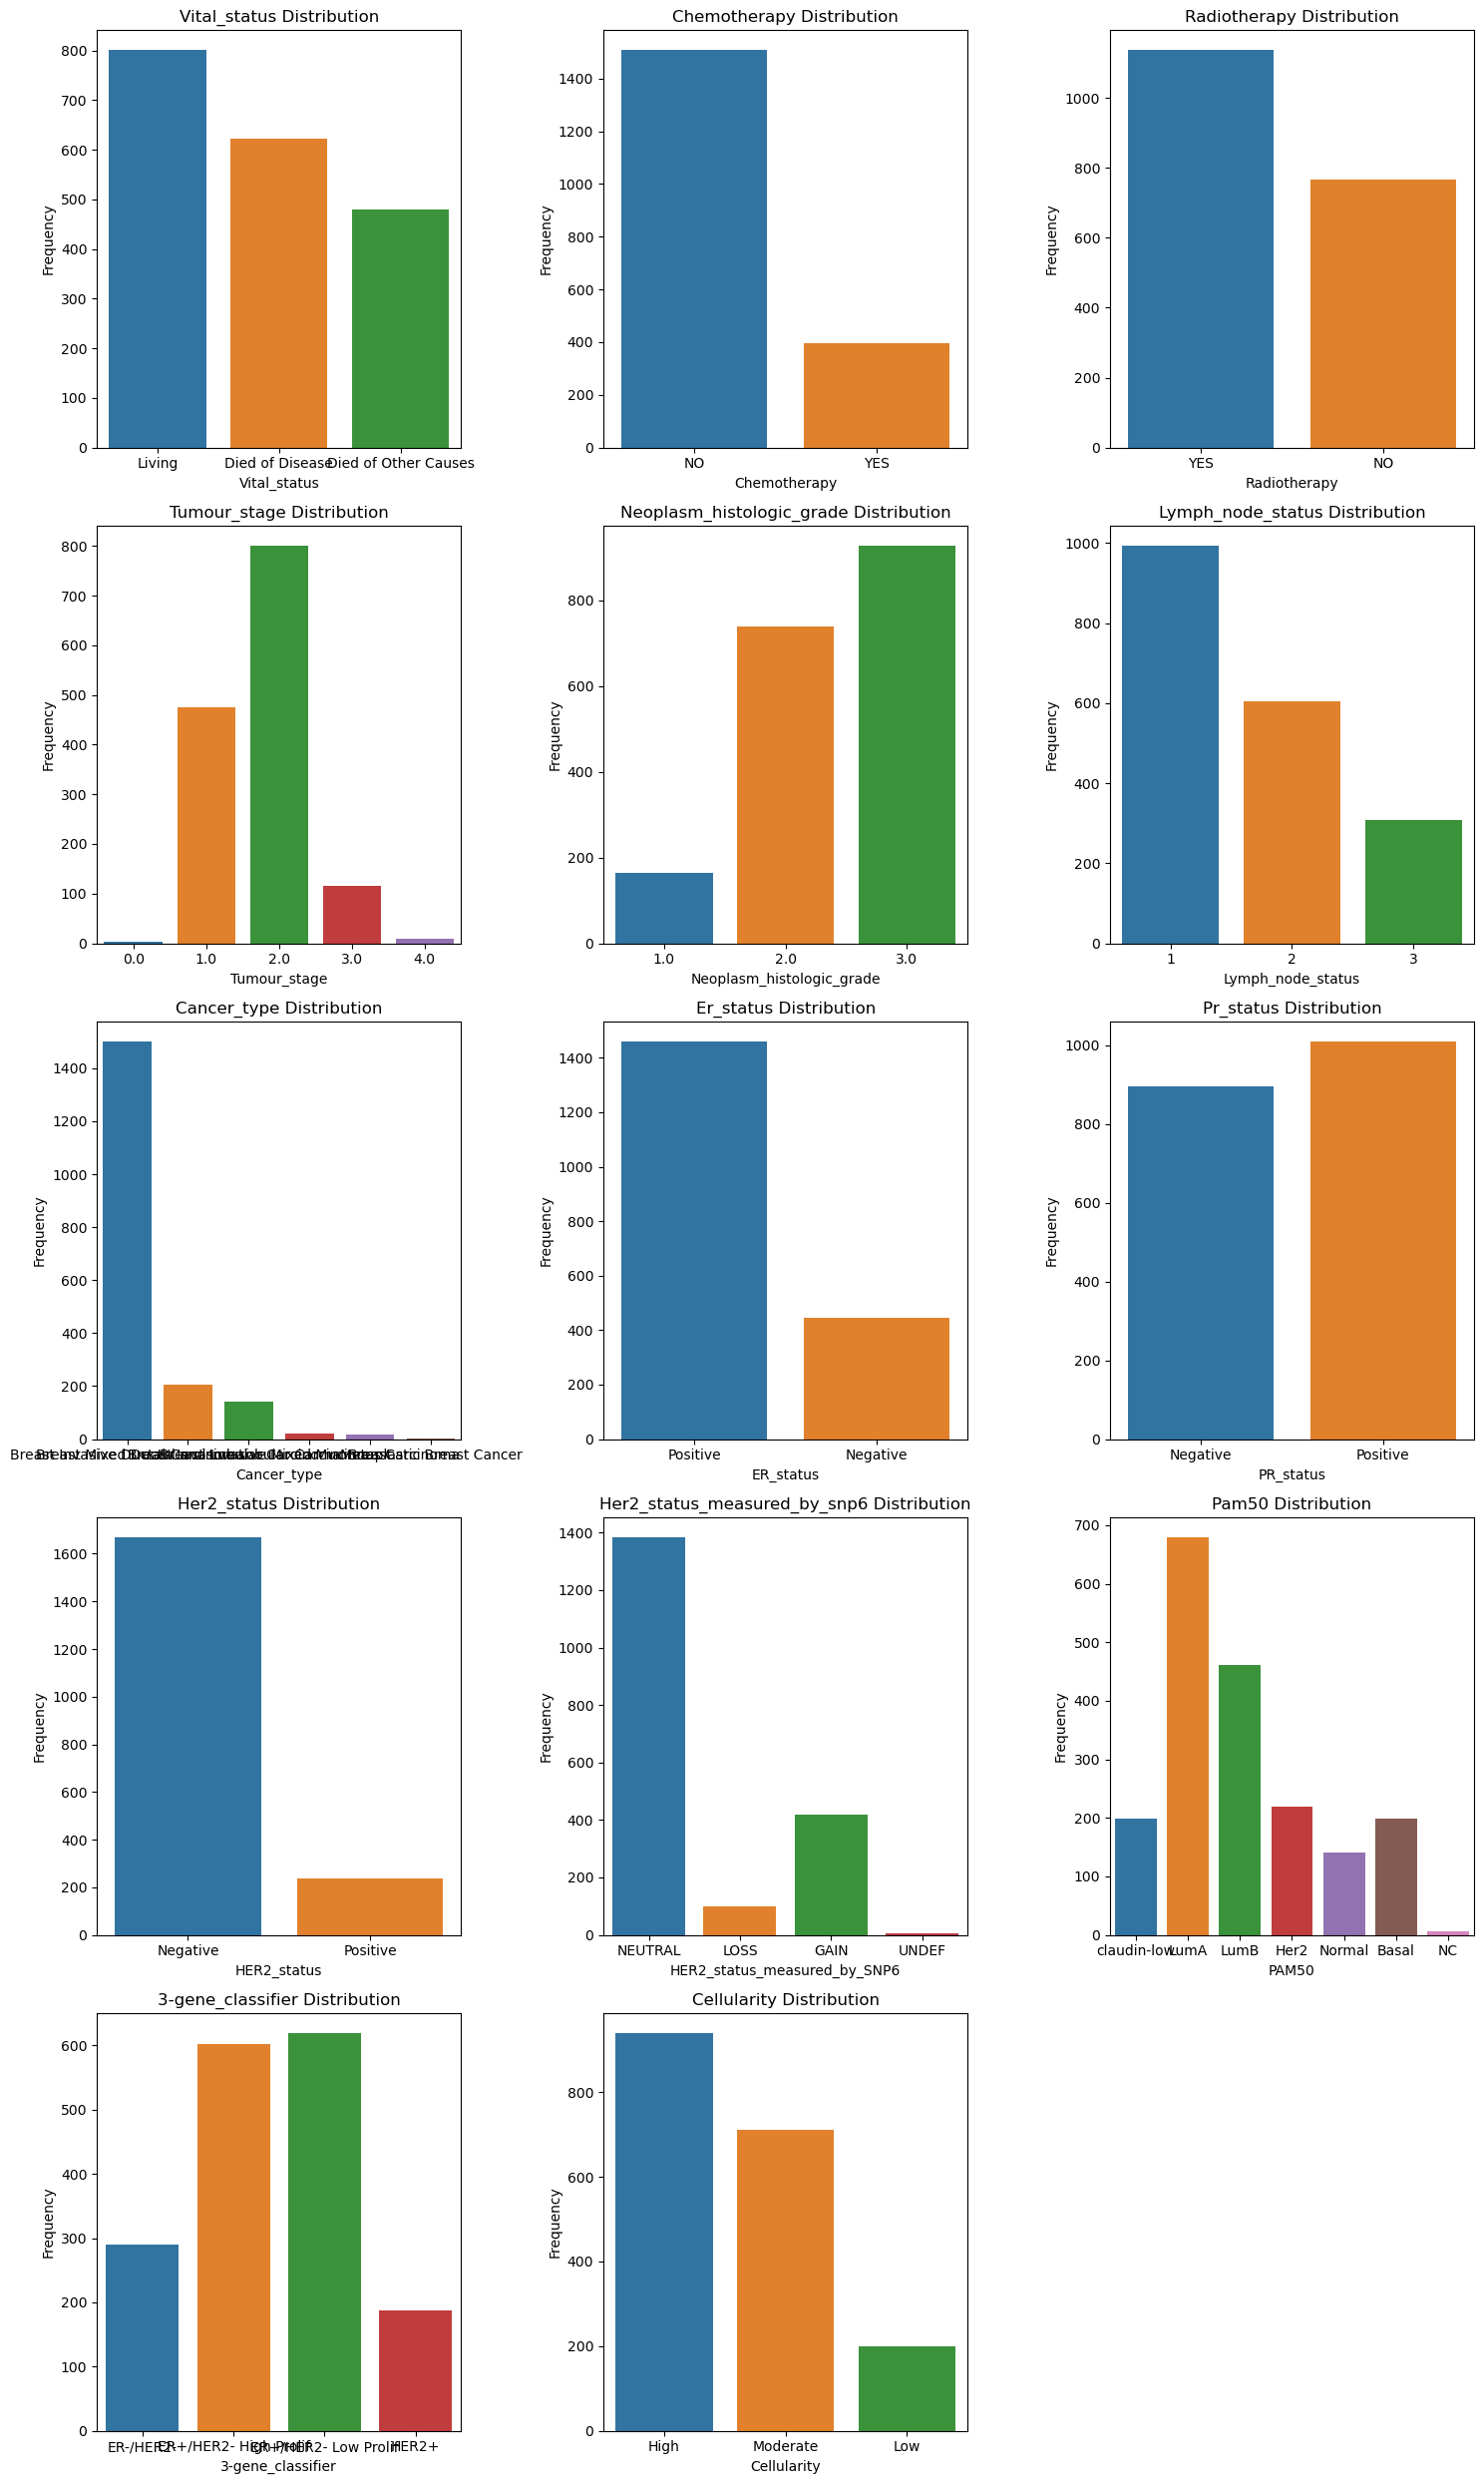

In [ ]:

# Calculate the number of rows and columns for the grid layout
num_vars = len(categorical_vars)
num_cols = 3  # Number of columns
num_rows = (num_vars - 1) // num_cols + 1  # Number of rows

# Set up the plot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Iterate over each categorical variable and create a bar plot
for i, var in enumerate(categorical_vars):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.countplot(x=var, data=df, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"{var.capitalize()} Distribution")
    axes[row_idx, col_idx].set_xlabel(var)
    axes[row_idx, col_idx].set_ylabel("Frequency")

# Remove any empty subplot if the number of variables is not a multiple of num_cols
if num_vars % num_cols != 0:
    for j in range(num_vars % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()
plt.show()